# load_data

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
asset_details = pd.read_csv('./g-research-crypto-forecasting/asset_details.csv')
asset_details_df = asset_details.copy()

In [4]:
dt = pd.read_csv('./g-research-crypto-forecasting/train.csv')
df = dt.copy()
df

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.920000,25.874000,25.877000,1.210873e+02,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...,...
24236801,1632182400,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,1632182400,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236803,1632182400,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN
24236804,1632182400,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24236806 entries, 0 to 24236805
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  int64  
 1   Asset_ID   int64  
 2   Count      float64
 3   Open       float64
 4   High       float64
 5   Low        float64
 6   Close      float64
 7   Volume     float64
 8   VWAP       float64
 9   Target     float64
dtypes: float64(8), int64(2)
memory usage: 1.8 GB


In [6]:
df[['Count','Open','High','Low','Close','Volume','VWAP','Target']]=df[['Count','Open','High','Low','Close','Volume','VWAP', 'Target']].astype('float32')
df[['timestamp','Asset_ID']] = df[['timestamp','Asset_ID']].astype('int32')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24236806 entries, 0 to 24236805
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  int32  
 1   Asset_ID   int32  
 2   Count      float32
 3   Open       float32
 4   High       float32
 5   Low        float32
 6   Close      float32
 7   Volume     float32
 8   VWAP       float32
 9   Target     float32
dtypes: float32(8), int32(2)
memory usage: 924.6 MB


# fillna

In [7]:
df1 = df.copy()
df1.isna().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       750338
dtype: int64

In [8]:
df1 = df1.replace([np.inf, -np.inf], np.nan)
df1.isna().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP             16
Target       750338
dtype: int64

In [9]:
df1.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580078,2399.500000,2357.139893,2374.590088,19.233006,2373.116455,-0.004218
1,1514764860,0,5.0,8.530000,8.530000,8.530000,8.530000,78.379997,8.530000,-0.014399
2,1514764860,1,229.0,13835.194336,14013.799805,13666.110352,13850.175781,31.550062,13827.062500,-0.014643
3,1514764860,5,32.0,7.659600,7.659600,7.656700,7.657600,6626.713379,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.920000,25.874001,25.877001,121.087311,25.891363,-0.008264


In [10]:
def log_return_ahead(series, periods=15):
    return np.exp(-np.log(series).diff(periods=-periods).shift(-1)) - 1

df_change = pd.DataFrame()
for i in asset_details_df.Asset_ID:
    X = df1[df1.Asset_ID==i]
    X = X.reset_index(drop=True)
    X['Target2']=log_return_ahead(X.Close)[1:]
    df_change = pd.concat([df_change, X])
df_change['Target3'] = np.where(df_change.Target.isna(), df_change.Target2, df_change.Target)

In [11]:
# check
df_change.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Target2,Target3
0,1514764860,2,40.0,2376.580078,2399.500000,2357.139893,2374.590088,19.233006,2373.116455,-0.004218,NaN,-0.004218
1,1514764920,2,53.0,2374.553223,2400.899902,2354.199951,2372.286621,24.050259,2371.434570,-0.004079,-0.004079,-0.004079
2,1514764980,2,61.0,2371.633301,2401.899902,2353.699951,2372.063232,42.676437,2375.442871,-0.002892,-0.002892,-0.002892
3,1514765040,2,95.0,2376.060059,2406.399902,2344.000000,2370.566650,37.820919,2371.096191,-0.003718,-0.003718,-0.003718
4,1514765100,2,33.0,2372.656738,2404.600098,2343.399902,2370.173340,8.519679,2370.345703,-0.002171,-0.002171,-0.002171


In [12]:
df_change = df_change.drop(['Target', 'Target2'], axis=1)

In [13]:
df_change.isna().sum()

timestamp      0
Asset_ID       0
Count          0
Open           0
High           0
Low            0
Close          0
Volume         0
VWAP          16
Target3      227
dtype: int64

# time fitting

In [14]:
# check
for i in range(14):
    print(i, df_change[df_change.Asset_ID == i].shape)

0 (1942619, 10)
1 (1956282, 10)
2 (1953537, 10)
3 (1791867, 10)
4 (1156866, 10)
5 (1955140, 10)
6 (1956200, 10)
7 (1951127, 10)
8 (1592071, 10)
9 (1956030, 10)
10 (670497, 10)
11 (1701261, 10)
12 (1778749, 10)
13 (1874560, 10)


In [15]:
# to datetime
df_change['timestamp'] = pd.to_datetime(df_change['timestamp'], unit='s')
df_change.index = df_change['timestamp']
df_change.drop('timestamp', axis=1, inplace=True)
df_change.head(2)

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target3
timestamp,,,,,,,,,
2018-01-01 00:01:00,2,40.0,2376.580078,2399.500000,2357.139893,2374.590088,19.233006,2373.116455,-0.004218
2018-01-01 00:02:00,2,53.0,2374.553223,2400.899902,2354.199951,2372.286621,24.050259,2371.434570,-0.004079


In [16]:
# check time start by asset
df_change.reset_index().groupby('Asset_ID')['timestamp'].min()

Asset_ID
0    2018-01-01 00:01:00
1    2018-01-01 00:01:00
2    2018-01-01 00:01:00
3    2018-04-17 09:11:00
4    2019-04-12 14:34:00
5    2018-01-01 00:01:00
6    2018-01-01 00:01:00
7    2018-01-01 00:01:00
8    2018-05-09 08:07:00
9    2018-01-01 00:01:00
10   2018-05-10 15:21:00
11   2018-01-01 00:01:00
12   2018-02-16 23:53:00
13   2018-02-06 21:37:00
Name: timestamp, dtype: datetime64[ns]

In [17]:
fittime_df = df_change[df_change.index >= '2019-04-12 14:34:00']
fittime_df.head(2)

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target3
timestamp,,,,,,,,,
2019-04-12 14:34:00,2,76.0,282.343323,283.540009,280.640015,282.480011,143.997940,282.396240,-0.003690
2019-04-12 14:35:00,2,57.0,282.776672,283.790009,281.029999,282.873322,85.751717,282.843658,-0.001639


In [18]:
# check time start by asset
fittime_df.reset_index().groupby('Asset_ID')['timestamp'].min()

# asset10!!

Asset_ID
0    2019-04-12 14:34:00
1    2019-04-12 14:34:00
2    2019-04-12 14:34:00
3    2019-04-12 14:34:00
4    2019-04-12 14:34:00
5    2019-04-12 14:34:00
6    2019-04-12 14:34:00
7    2019-04-12 14:34:00
8    2019-04-12 14:34:00
9    2019-04-12 14:34:00
10   2019-04-12 14:41:00
11   2019-04-12 14:34:00
12   2019-04-12 14:34:00
13   2019-04-12 14:34:00
Name: timestamp, dtype: datetime64[ns]

# Create Full-Table

In [19]:
fulltable_df = pd.DataFrame()
for i in df_change.Asset_ID.unique():
    tmp_df = df_change[df_change.Asset_ID == i].resample(rule='T')
    tmp_df = tmp_df.interpolate(method='linear')
    fulltable_df = pd.concat([fulltable_df, tmp_df])
    
fulltable_df.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target3
timestamp,,,,,,,,,
2018-01-01 00:01:00,2.0,40.0,2376.580078,2399.500000,2357.139893,2374.590088,19.233006,2373.116455,-0.004218
2018-01-01 00:02:00,2.0,53.0,2374.553223,2400.899902,2354.199951,2372.286621,24.050259,2371.434570,-0.004079
2018-01-01 00:03:00,2.0,61.0,2371.633301,2401.899902,2353.699951,2372.063232,42.676437,2375.442871,-0.002892
2018-01-01 00:04:00,2.0,95.0,2376.060059,2406.399902,2344.000000,2370.566650,37.820919,2371.096191,-0.003718
2018-01-01 00:05:00,2.0,33.0,2372.656738,2404.600098,2343.399902,2370.173340,8.519679,2370.345703,-0.002171


In [20]:
fitedtime_df = fulltable_df[fulltable_df.index >= '2019-04-12 14:34:00']
fitedtime_df.head(2)

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target3
timestamp,,,,,,,,,
2019-04-12 14:34:00,2.0,76.0,282.343323,283.540009,280.640015,282.480011,143.997940,282.396240,-0.003690
2019-04-12 14:35:00,2.0,57.0,282.776672,283.790009,281.029999,282.873322,85.751717,282.843658,-0.001639


In [21]:
# check
for i in range(14):
    print(i, fitedtime_df[fitedtime_df.Asset_ID == i].shape)

0 (1285047, 9)
1 (1285047, 9)
2 (1285047, 9)
3 (1285047, 9)
4 (1285047, 9)
5 (1285047, 9)
6 (1285047, 9)
7 (1285047, 9)
8 (1285047, 9)
9 (1285047, 9)
10 (1285047, 9)
11 (1285047, 9)
12 (1285047, 9)
13 (1285047, 9)


In [22]:
# check 2
fitedtime_df.reset_index().groupby('Asset_ID')['timestamp'].min()

Asset_ID
0.0    2019-04-12 14:34:00
1.0    2019-04-12 14:34:00
2.0    2019-04-12 14:34:00
3.0    2019-04-12 14:34:00
4.0    2019-04-12 14:34:00
5.0    2019-04-12 14:34:00
6.0    2019-04-12 14:34:00
7.0    2019-04-12 14:34:00
8.0    2019-04-12 14:34:00
9.0    2019-04-12 14:34:00
10.0   2019-04-12 14:34:00
11.0   2019-04-12 14:34:00
12.0   2019-04-12 14:34:00
13.0   2019-04-12 14:34:00
Name: timestamp, dtype: datetime64[ns]

In [23]:
# check 3
fitedtime_df.isna().sum()

Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target3     0
dtype: int64

# Scaling

In [24]:
# drop
resample_df = fitedtime_df.drop(['Asset_ID', 'Target3'],axis=1)
resample_df.head(2)

,Count,Open,High,Low,Close,Volume,VWAP
timestamp,,,,,,,
2019-04-12 14:34:00,76.0,282.343323,283.540009,280.640015,282.480011,143.997940,282.396240
2019-04-12 14:35:00,57.0,282.776672,283.790009,281.029999,282.873322,85.751717,282.843658


In [25]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scaled_df = mms.fit_transform(resample_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.head()

,0,1,2,3,4,5,6
0,0.000455,0.004357,0.004369,0.004340,0.004359,1.900141e-07,0.016496
1,0.000339,0.004363,0.004373,0.004346,0.004365,1.133496e-07,0.016503
2,0.000448,0.004365,0.004375,0.004347,0.004365,1.288732e-07,0.016504
3,0.000188,0.004365,0.004378,0.004348,0.004365,4.711323e-08,0.016505
4,0.000158,0.004361,0.004376,0.004348,0.004361,3.066040e-08,0.016500


In [26]:
scaled_df.columns = ['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']
scaled_df.index = resample_df.index
scaled_df['Asset_ID'] = fitedtime_df['Asset_ID'].astype('int64')
scaled_df['Target'] = fitedtime_df['Target3']
scaled_df.head()

,Count,Open,High,Low,Close,Volume,VWAP,Asset_ID,Target
timestamp,,,,,,,,,
2019-04-12 14:34:00,0.000455,0.004357,0.004369,0.004340,0.004359,1.900141e-07,0.016496,2,-0.003690
2019-04-12 14:35:00,0.000339,0.004363,0.004373,0.004346,0.004365,1.133496e-07,0.016503,2,-0.001639
2019-04-12 14:36:00,0.000448,0.004365,0.004375,0.004347,0.004365,1.288732e-07,0.016504,2,-0.002862
2019-04-12 14:37:00,0.000188,0.004365,0.004378,0.004348,0.004365,4.711323e-08,0.016505,2,-0.000222
2019-04-12 14:38:00,0.000158,0.004361,0.004376,0.004348,0.004361,3.066040e-08,0.016500,2,-0.005420


In [27]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17990658 entries, 2019-04-12 14:34:00 to 2021-09-21 00:00:00
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Count     float64
 1   Open      float64
 2   High      float64
 3   Low       float64
 4   Close     float64
 5   Volume    float64
 6   VWAP      float64
 7   Asset_ID  int64  
 8   Target    float64
dtypes: float64(8), int64(1)
memory usage: 1.3 GB


In [28]:
final_df = scaled_df.reset_index()
final_df.head()

,timestamp,Count,Open,High,Low,Close,Volume,VWAP,Asset_ID,Target
0,2019-04-12 14:34:00,0.000455,0.004357,0.004369,0.004340,0.004359,1.900141e-07,0.016496,2,-0.003690
1,2019-04-12 14:35:00,0.000339,0.004363,0.004373,0.004346,0.004365,1.133496e-07,0.016503,2,-0.001639
2,2019-04-12 14:36:00,0.000448,0.004365,0.004375,0.004347,0.004365,1.288732e-07,0.016504,2,-0.002862
3,2019-04-12 14:37:00,0.000188,0.004365,0.004378,0.004348,0.004365,4.711323e-08,0.016505,2,-0.000222
4,2019-04-12 14:38:00,0.000158,0.004361,0.004376,0.004348,0.004361,3.066040e-08,0.016500,2,-0.005420


# Sorting Table

In [29]:
final_df2 = final_df.sort_values(['timestamp', 'Asset_ID'])
final_df2 = final_df2.reset_index(drop=True)
final_df3 = final_df2[['Asset_ID', 'timestamp','Count','Open','High','Low','Close','Volume','VWAP', 'Target']]

final_df3.tail(14)

,Asset_ID,timestamp,Count,Open,High,Low,Close,Volume,VWAP,Target
17990644,0,2021-09-21,0.002594,0.005619,0.005616,0.005624,0.005613,1.317586e-06,0.017743,0.008493
17990645,1,2021-09-21,0.016344,0.663673,0.663305,0.664316,0.663531,1.692296e-07,0.667857,0.002726
17990646,2,2021-09-21,0.002436,0.008365,0.008361,0.008344,0.008348,7.676115e-07,0.020449,-0.000482
17990647,3,2021-09-21,0.004097,0.000032,0.000032,0.000032,0.000032,2.172494e-04,0.012223,-0.001147
17990648,4,2021-09-21,0.003248,0.000003,0.000003,0.000003,0.000003,1.501729e-03,0.012195,0.000151
17990649,5,2021-09-21,0.002721,0.000065,0.000065,0.000065,0.000065,5.404998e-05,0.012255,-0.002096
17990650,6,2021-09-21,0.013356,0.045935,0.045899,0.045915,0.045867,1.586289e-06,0.057546,-0.000346
17990651,7,2021-09-21,0.001279,0.000758,0.000757,0.000758,0.000757,1.888393e-06,0.012940,-0.000795
17990652,8,2021-09-21,0.000491,0.000020,0.000020,0.000020,0.000020,1.124411e-05,0.012211,0.003364
17990653,9,2021-09-21,0.004690,0.002425,0.002423,0.002423,0.002422,6.138939e-06,0.014585,-0.001154


In [30]:
final_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17990658 entries, 0 to 17990657
Data columns (total 10 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Asset_ID   int64         
 1   timestamp  datetime64[ns]
 2   Count      float64       
 3   Open       float64       
 4   High       float64       
 5   Low        float64       
 6   Close      float64       
 7   Volume     float64       
 8   VWAP       float64       
 9   Target     float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 GB


In [66]:
final_df3[['Count','Open','High','Low','Close','Volume','VWAP','Target']]=final_df3[['Count','Open','High','Low','Close','Volume','VWAP', 'Target']].astype('float32')
final_df3['Asset_ID'] = final_df3['Asset_ID'].astype('int32')

final_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17990658 entries, 0 to 17990657
Data columns (total 10 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Asset_ID   int32         
 1   timestamp  datetime64[ns]
 2   Count      float32       
 3   Open       float32       
 4   High       float32       
 5   Low        float32       
 6   Close      float32       
 7   Volume     float32       
 8   VWAP       float32       
 9   Target     float32       
dtypes: datetime64[ns](1), float32(8), int32(1)
memory usage: 754.9 MB


In [67]:
final_df3.shape[0]/14

1285047.0

# Create X, Y
- 4분 간의 데이터를 통해 15분 후의 가격 예측

In [68]:
X_candi = final_df3[['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']]
X_candi.head()
X_candi.info()
X_candi.head()

,Count,Open,High,Low,Close,Volume,VWAP
0,0.000073,0.000275,0.000275,2.758503e-04,0.000275,1.192093e-06,0.012466
1,0.002024,0.078064,0.078613,7.775879e-02,0.078125,1.192093e-07,0.089355
2,0.000454,0.004356,0.004368,4.341125e-03,0.004360,1.788139e-07,0.016495
3,0.000067,0.000001,0.000001,1.311302e-06,0.000001,1.051426e-04,0.012192
4,0.000055,0.000000,0.000000,5.960464e-08,0.000000,2.529621e-04,0.012192


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17990658 entries, 0 to 17990657
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Count   float32
 1   Open    float32
 2   High    float32
 3   Low     float32
 4   Close   float32
 5   Volume  float32
 6   VWAP    float32
dtypes: float32(7)
memory usage: 480.4 MB


,Count,Open,High,Low,Close,Volume,VWAP
0,0.000073,0.000275,0.000275,2.758503e-04,0.000275,1.192093e-06,0.012466
1,0.002024,0.078064,0.078613,7.775879e-02,0.078125,1.192093e-07,0.089355
2,0.000454,0.004356,0.004368,4.341125e-03,0.004360,1.788139e-07,0.016495
3,0.000067,0.000001,0.000001,1.311302e-06,0.000001,1.051426e-04,0.012192
4,0.000055,0.000000,0.000000,5.960464e-08,0.000000,2.529621e-04,0.012192


In [34]:
X_candi.shape

(17990658, 7)

## numpy 최신 버전의 sliding_window_view

In [35]:
class DummyArray:

    def __init__(self, interface, base=None):
        self.__array_interface__ = interface
        self.base = base
        
def _maybe_view_as_subclass(original_array, new_array):
    if type(original_array) is not type(new_array):
        # if input was an ndarray subclass and subclasses were OK,
        # then view the result as that subclass.
        new_array = new_array.view(type=type(original_array))
        # Since we have done something akin to a view from original_array, we
        # should let the subclass finalize (if it has it implemented, i.e., is
        # not None).
        if new_array.__array_finalize__:
            new_array.__array_finalize__(original_array)
    return new_array

def as_strided(x, shape=None, strides=None, subok=False, writeable=True):
    # first convert input to array, possibly keeping subclass
    x = np.array(x, copy=False, subok=subok)
    interface = dict(x.__array_interface__)
    if shape is not None:
        interface['shape'] = tuple(shape)
    if strides is not None:
        interface['strides'] = tuple(strides)

    array = np.asarray(DummyArray(interface, base=x))
    # The route via `__interface__` does not preserve structured
    # dtypes. Since dtype should remain unchanged, we set it explicitly.
    array.dtype = x.dtype

    view = _maybe_view_as_subclass(x, array)

    if view.flags.writeable and not writeable:
        view.flags.writeable = False

    return view

def sliding_window_view(x, window_shape, axis=None, *, subok=False, writeable=False):
    window_shape = (tuple(window_shape)
                    if np.iterable(window_shape)
                    else (window_shape,))
    # first convert input to array, possibly keeping subclass
    x = np.array(x, copy=False, subok=subok)

    window_shape_array = np.array(window_shape)
    if np.any(window_shape_array < 0):
        raise ValueError('`window_shape` cannot contain negative values')

    if axis is None:
        axis = tuple(range(x.ndim))
        if len(window_shape) != len(axis):
            raise ValueError(f'Since axis is `None`, must provide '
                             f'window_shape for all dimensions of `x`; '
                             f'got {len(window_shape)} window_shape elements '
                             f'and `x.ndim` is {x.ndim}.')
    else:
        axis = normalize_axis_tuple(axis, x.ndim, allow_duplicate=True)
        if len(window_shape) != len(axis):
            raise ValueError(f'Must provide matching length window_shape and '
                             f'axis; got {len(window_shape)} window_shape '
                             f'elements and {len(axis)} axes elements.')

    out_strides = x.strides + tuple(x.strides[ax] for ax in axis)

    # note: same axis can be windowed repeatedly
    x_shape_trimmed = list(x.shape)
    for ax, dim in zip(axis, window_shape):
        if x_shape_trimmed[ax] < dim:
            raise ValueError(
                'window shape cannot be larger than input array shape')
        x_shape_trimmed[ax] -= dim - 1
    out_shape = tuple(x_shape_trimmed) + window_shape
    return as_strided(x, strides=out_strides, shape=out_shape,
                      subok=subok, writeable=writeable)

In [36]:
shape = (56 ,7)
X = sliding_window_view(X_candi, shape)
X

array([[[[7.2718e-05, 2.7537e-04, 2.7490e-04, ..., 2.7537e-04,
          1.1921e-06, 1.2466e-02],
         [2.0237e-03, 7.8064e-02, 7.8613e-02, ..., 7.8125e-02,
          1.1921e-07, 8.9355e-02],
         [4.5443e-04, 4.3564e-03, 4.3678e-03, ..., 4.3602e-03,
          1.7881e-07, 1.6495e-02],
         ...,
         [3.6359e-05, 1.0242e-03, 1.0233e-03, ..., 1.0242e-03,
          3.5763e-07, 1.3206e-02],
         [1.5152e-04, 1.7285e-06, 1.7881e-06, ..., 1.7285e-06,
          6.9439e-05, 1.2192e-02],
         [8.4817e-05, 4.1723e-07, 4.1723e-07, ..., 4.1723e-07,
          2.4724e-04, 1.2192e-02]]],


       [[[2.0237e-03, 7.8064e-02, 7.8613e-02, ..., 7.8125e-02,
          1.1921e-07, 8.9355e-02],
         [4.5443e-04, 4.3564e-03, 4.3678e-03, ..., 4.3602e-03,
          1.7881e-07, 1.6495e-02],
         [6.6638e-05, 1.2517e-06, 1.2517e-06, ..., 1.2517e-06,
          1.0514e-04, 1.2192e-02],
         ...,
         [1.5152e-04, 1.7285e-06, 1.7881e-06, ..., 1.7285e-06,
          6.9439e-05, 1

In [37]:
X.shape

(17990603, 1, 56, 7)

In [38]:
X = X.reshape(17990603, 56, 7)
X.shape

(17990603, 56, 7)

In [39]:
# check
X_candi.shape[0] / 14

1285047.0

In [40]:
X = X[0:17990603:14]
X.shape

(1285044, 56, 7)

In [41]:
# 3분 간의 데이터가 남는 것을 확인할 수 있음

In [42]:
y_candi = final_df3['Close']

In [43]:
y_candi.shape

(17990658,)

In [44]:
y_candi

0           0.000275
1           0.078125
2           0.004360
3           0.000001
4           0.000000
              ...   
17990653    0.002422
17990654    0.037537
17990655    0.003584
17990656    0.000004
17990657    0.000001
Name: Close, Length: 17990658, dtype: float16

In [45]:
# 0 ~ 13번 인덱스에서 15분 뒤의 가격
y_candi = y_candi[210:]
y_candi.shape

(17990448,)

In [46]:
shape = (56, )
y = sliding_window_view(y_candi, shape)
y = y[::14]
y.shape

(1285029, 56)

In [47]:
print(X.shape)
print(y.shape)

(1285044, 56, 7)
(1285029, 56)


# X, y resizing

In [48]:
resize_X = X[:1285029]
resize_X.shape

(1285029, 56, 7)

In [49]:
# first_value check
resize_X[15][0][4] == y[0][0]

True

In [50]:
# last value check
resize_X[1285028][0][4] == y[1285013][0]

True

# Train_Test_split

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(resize_X, y, test_size=0.8, shuffle=False)

In [52]:
X_train.shape, X_valid.shape

((257005, 56, 7), (1028024, 56, 7))

In [53]:
y_train.shape, y_valid.shape

((257005, 56), (1028024, 56))

In [54]:
import tensorflow as tf
from tensorflow import keras

In [72]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[56, 7]))
model.add(keras.layers.LSTM(20, return_sequences=True))
keras.layers.Dropout(0.3),
model.add(keras.layers.LSTM(20, return_sequences=True))
keras.layers.Dropout(0.3),
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

(<keras.layers.core.dropout.Dropout at 0x1e2c1eca670>,)

(<keras.layers.core.dropout.Dropout at 0x1e2c2797190>,)

In [73]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 56, 20)            2240      
                                                                 
 lstm_3 (LSTM)               (None, 56, 20)            3280      
                                                                 
 dense_2 (Dense)             (None, 56, 1)             21        
                                                                 
Total params: 5,541
Trainable params: 5,541
Non-trainable params: 0
_________________________________________________________________


In [74]:
history = model.fit(X_train, y_train, batch_size=56, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
4590/4590 [==============================] - 229s 49ms/step - loss: 3.0961e-05 - mae: 8.2638e-04 - val_loss: 3.5582e-04 - val_mae: 0.0039
Epoch 2/20
4590/4590 [==============================] - 221s 48ms/step - loss: 6.0457e-08 - mae: 1.4783e-04 - val_loss: 3.6361e-04 - val_mae: 0.0038
Epoch 3/20
4590/4590 [==============================] - 220s 48ms/step - loss: 5.5153e-08 - mae: 1.3399e-04 - val_loss: 3.8377e-04 - val_mae: 0.0037
Epoch 4/20
4590/4590 [==============================] - 221s 48ms/step - loss: 5.1584e-08 - mae: 1.2298e-04 - val_loss: 3.9249e-04 - val_mae: 0.0036
Epoch 5/20
4590/4590 [==============================] - 229s 50ms/step - loss: 4.9701e-08 - mae: 1.1874e-04 - val_loss: 4.0358e-04 - val_mae: 0.0037
Epoch 6/20
4590/4590 [==============================] - 223s 49ms/step - loss: 4.8369e-08 - mae: 1.1372e-04 - val_loss: 4.1856e-04 - val_mae: 0.0038
Epoch 7/20
4590/4590 [==============================] - 222s 48ms/step - loss: 4.8226e-08 - mae: 1.1198e-0

In [75]:
y_pred = model.predict(X_valid)

<Figure size 2160x720 with 0 Axes>

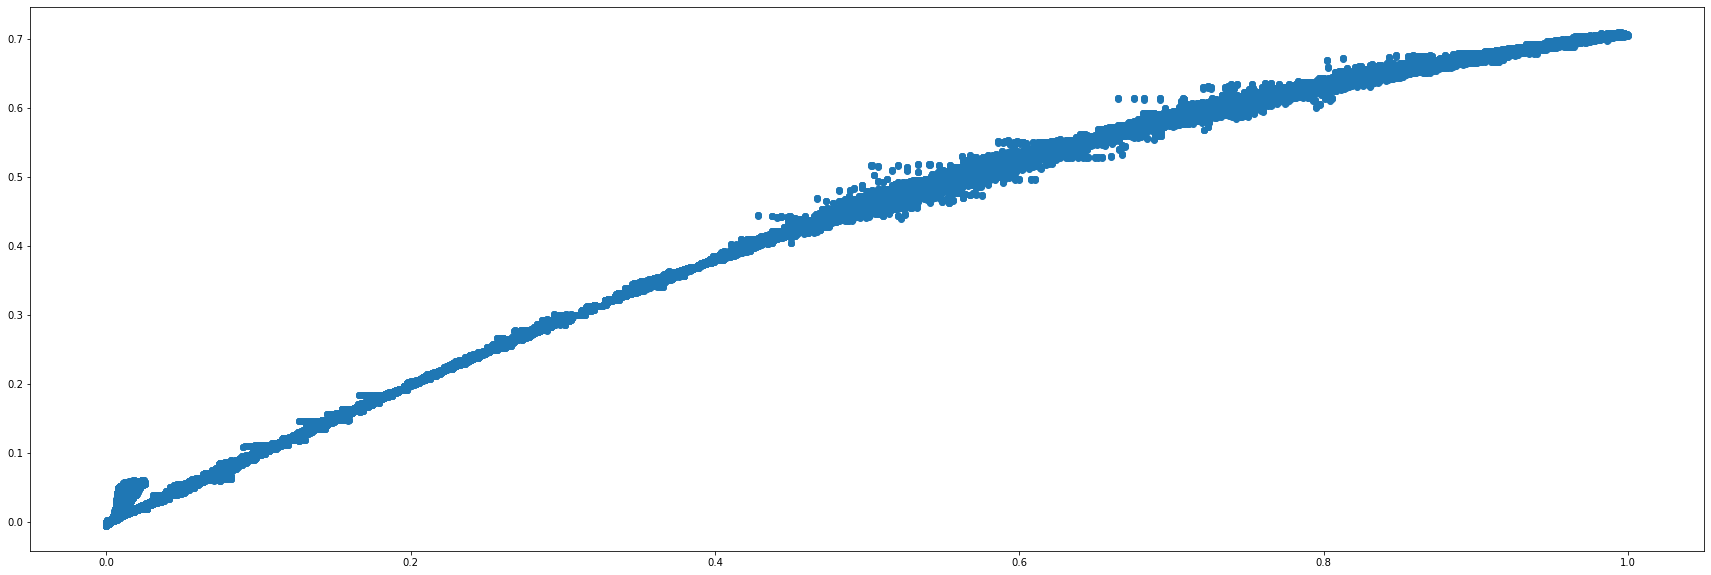

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,10))
plt.scatter(y_valid, y_pred)

In [77]:
y_pred[:,0].shape

(1028024, 1)

In [78]:
y_predict = y_pred.reshape(-1, 56)
y_predict.shape

(1028024, 56)

<Figure size 2160x720 with 0 Axes>

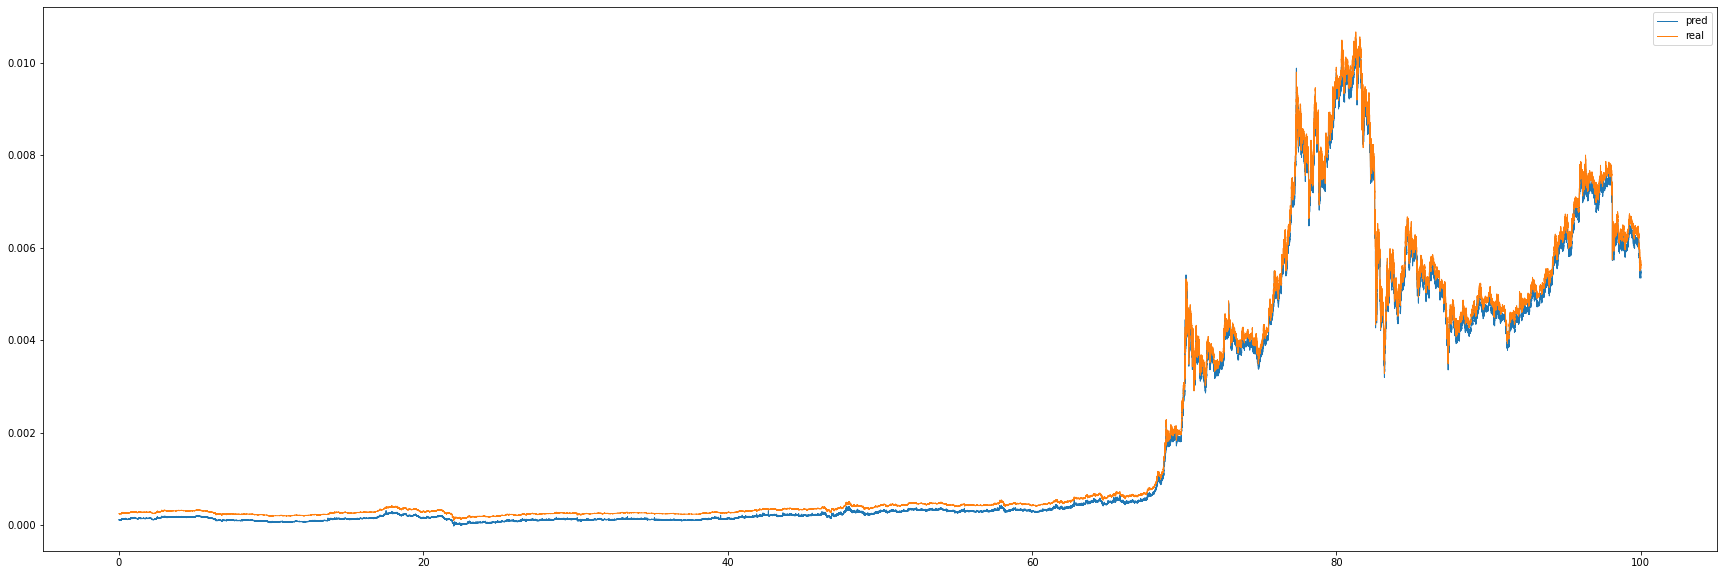

<Figure size 2160x720 with 0 Axes>

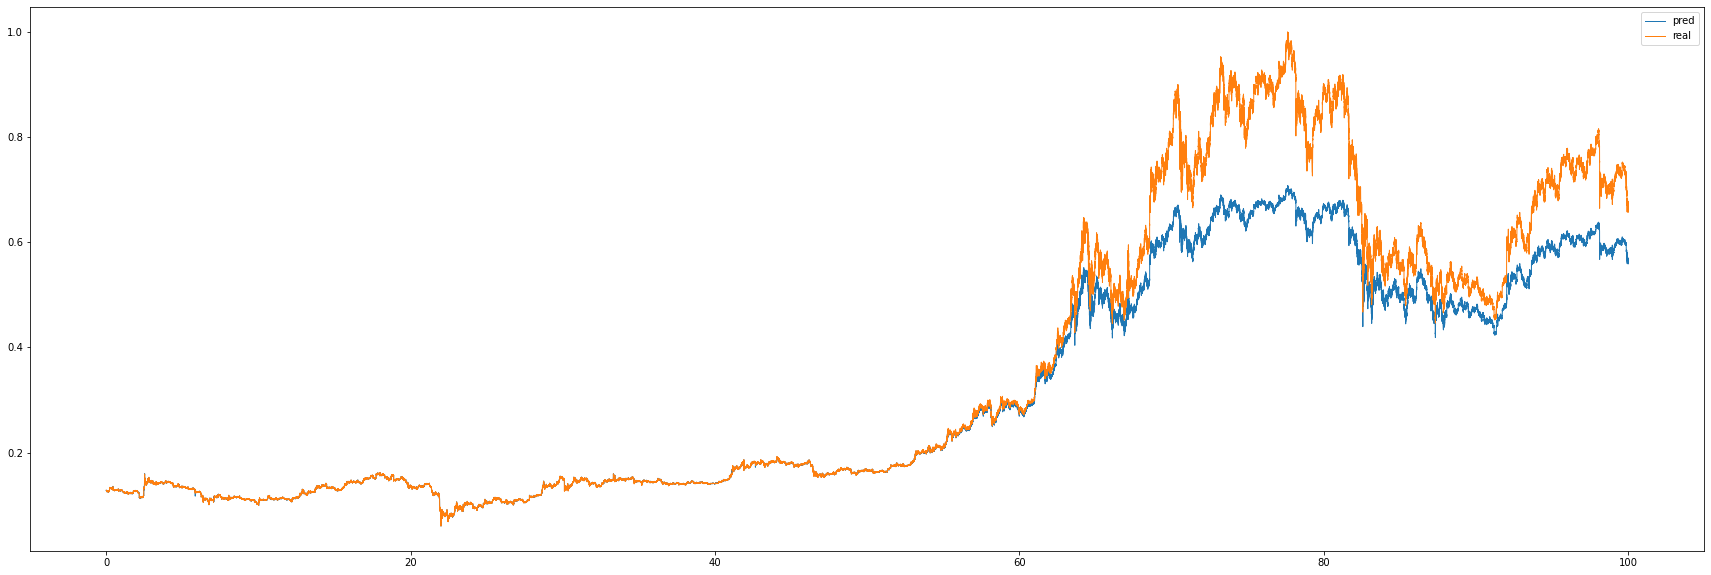

<Figure size 2160x720 with 0 Axes>

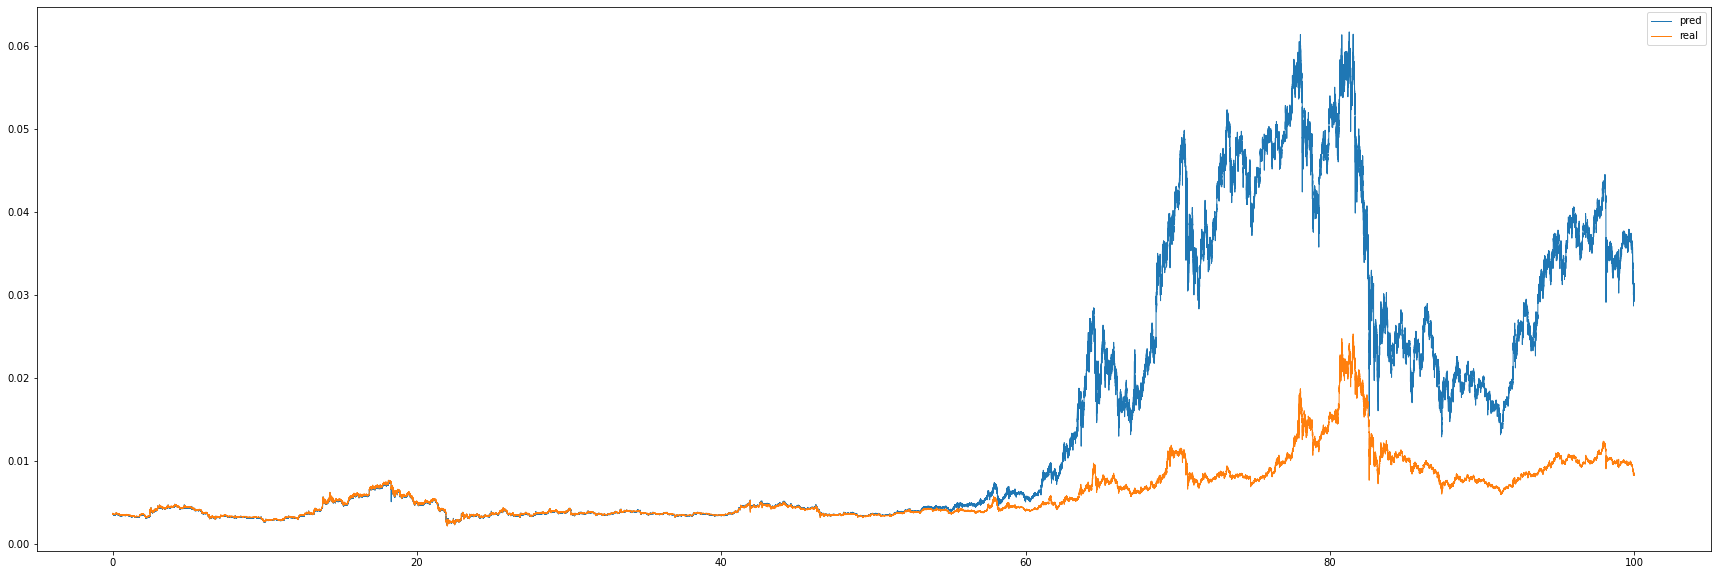

<Figure size 2160x720 with 0 Axes>

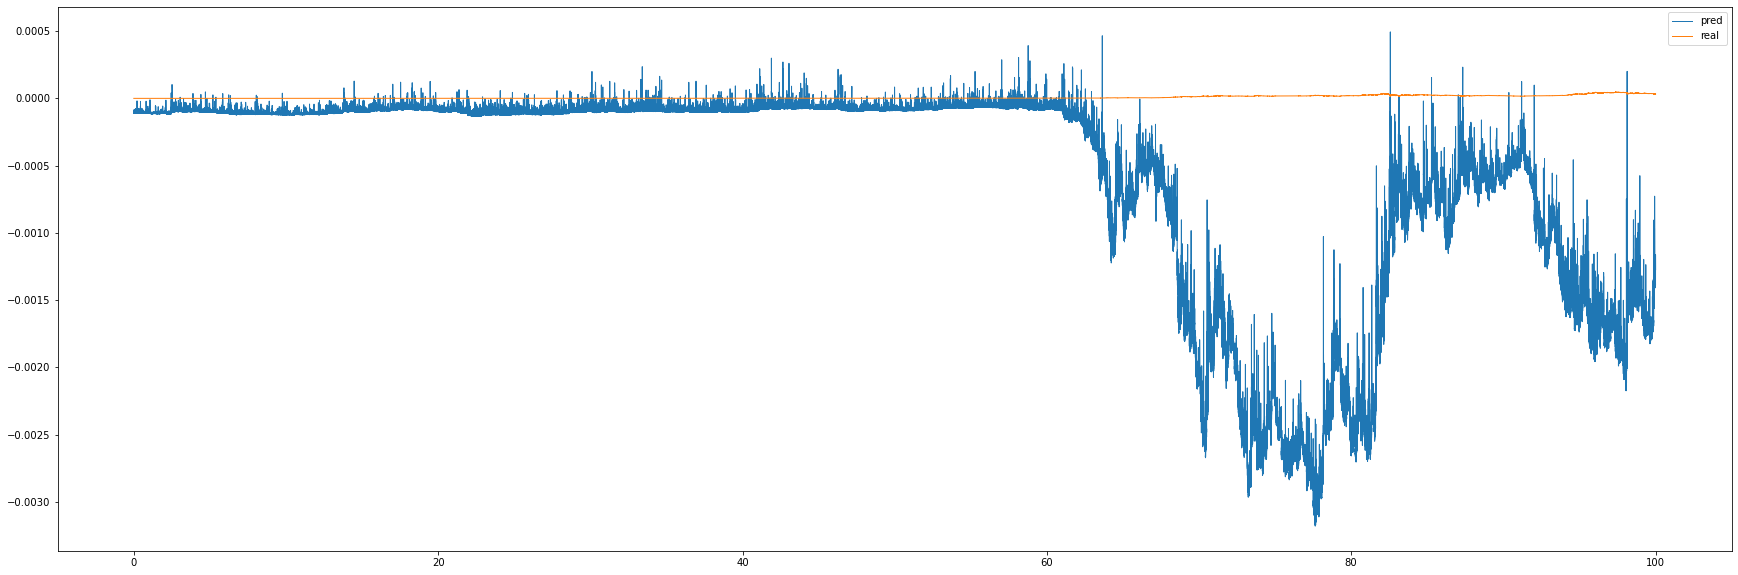

<Figure size 2160x720 with 0 Axes>

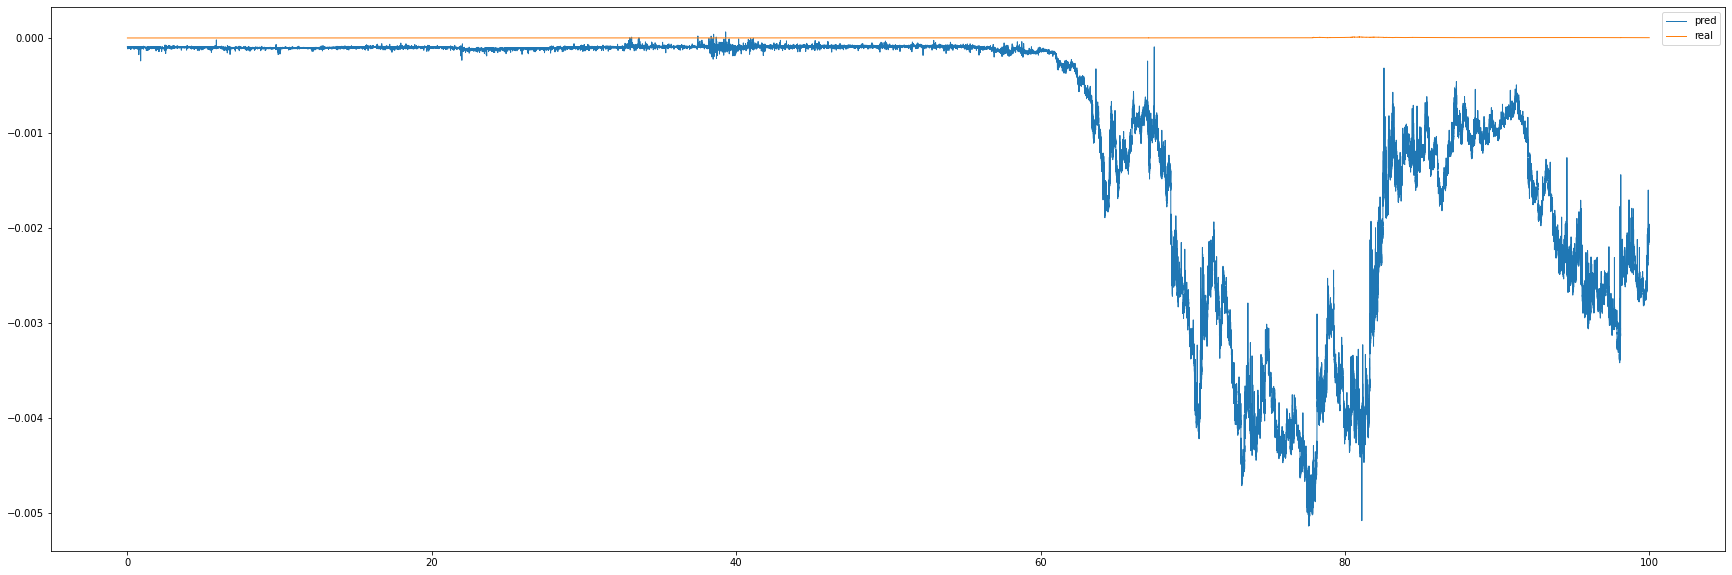

<Figure size 2160x720 with 0 Axes>

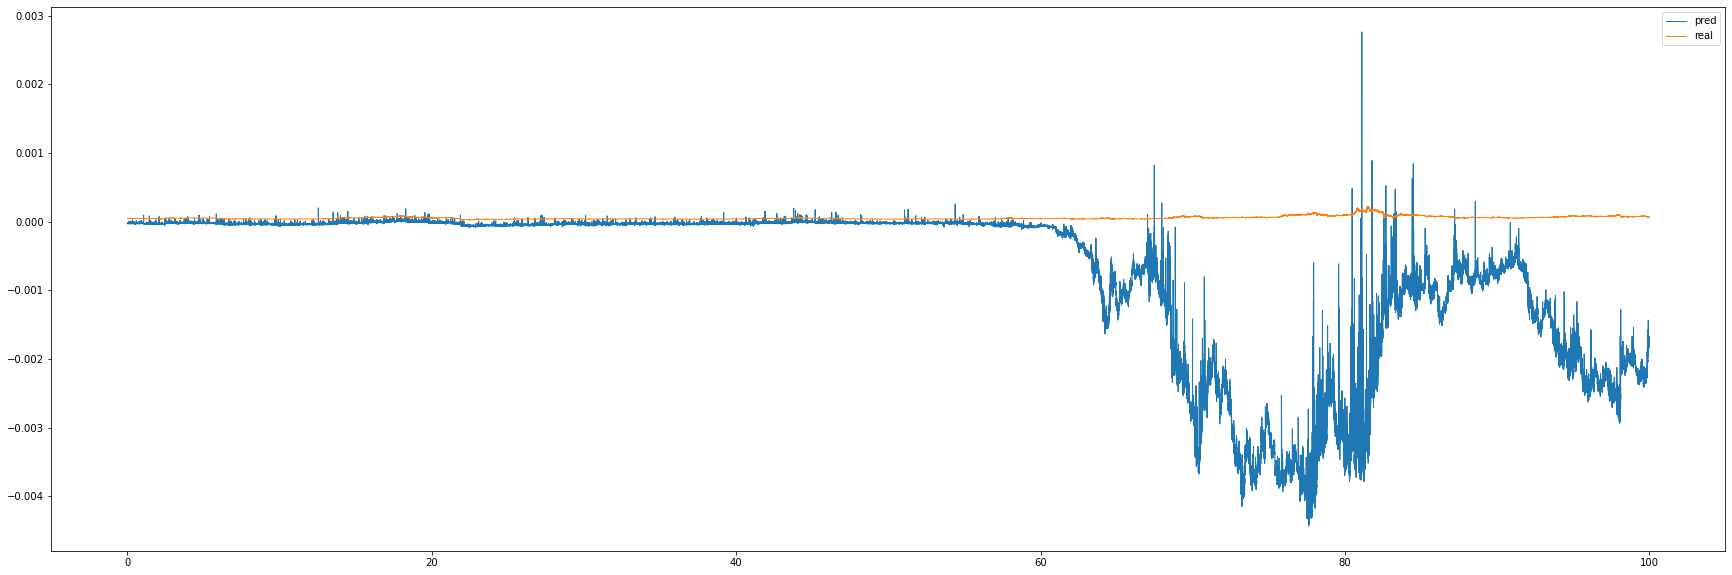

<Figure size 2160x720 with 0 Axes>

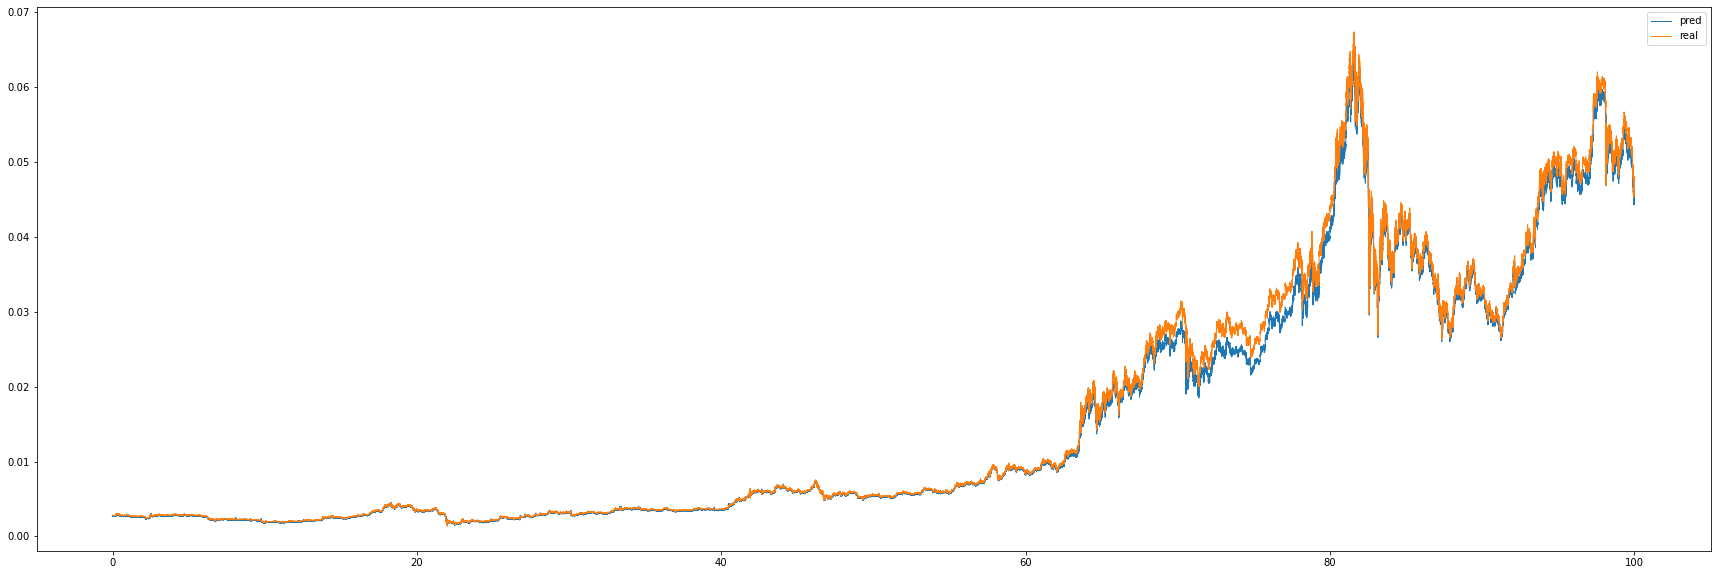

<Figure size 2160x720 with 0 Axes>

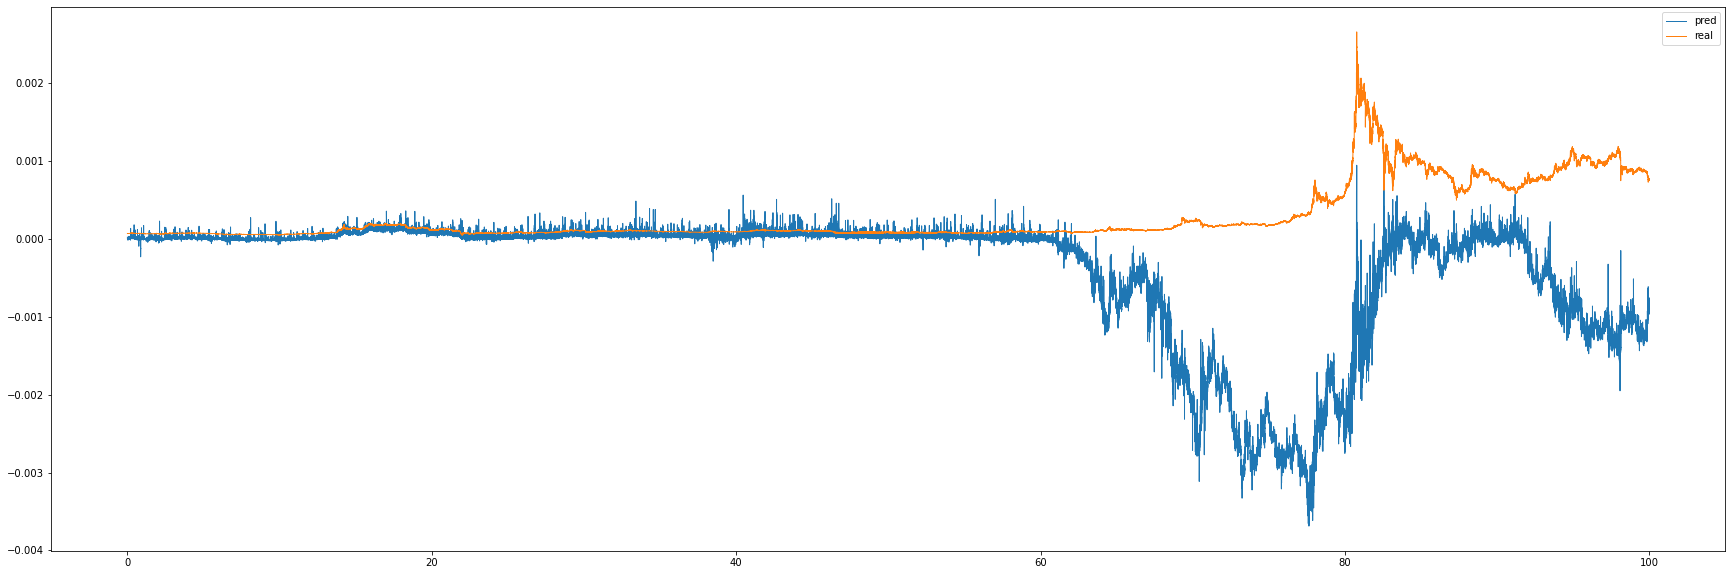

<Figure size 2160x720 with 0 Axes>

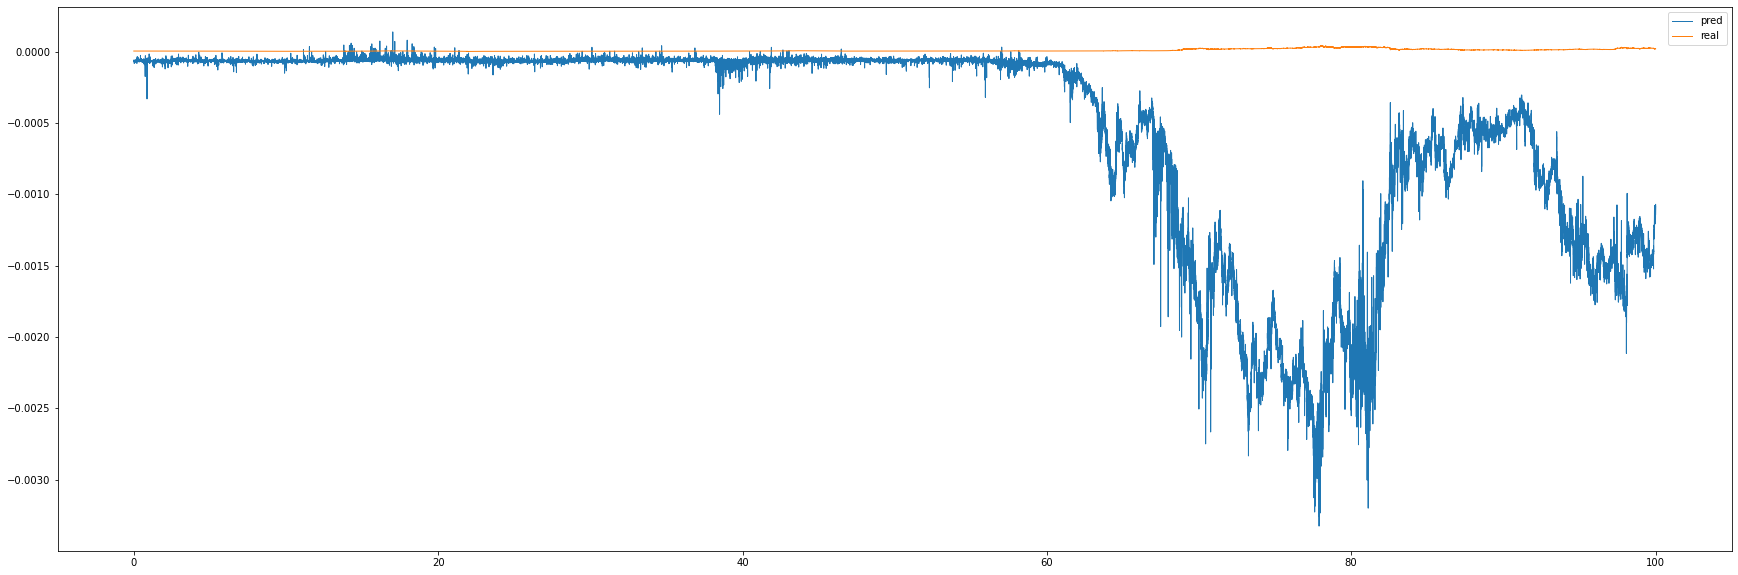

<Figure size 2160x720 with 0 Axes>

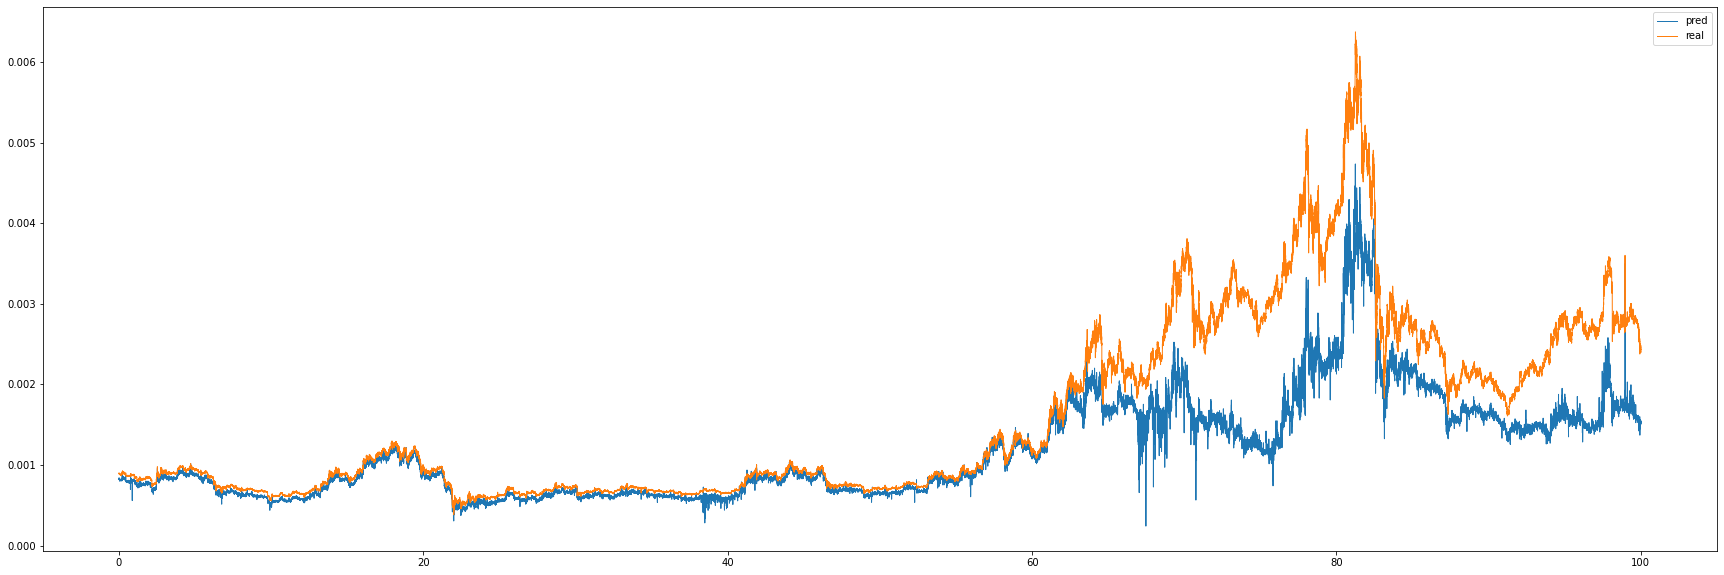

<Figure size 2160x720 with 0 Axes>

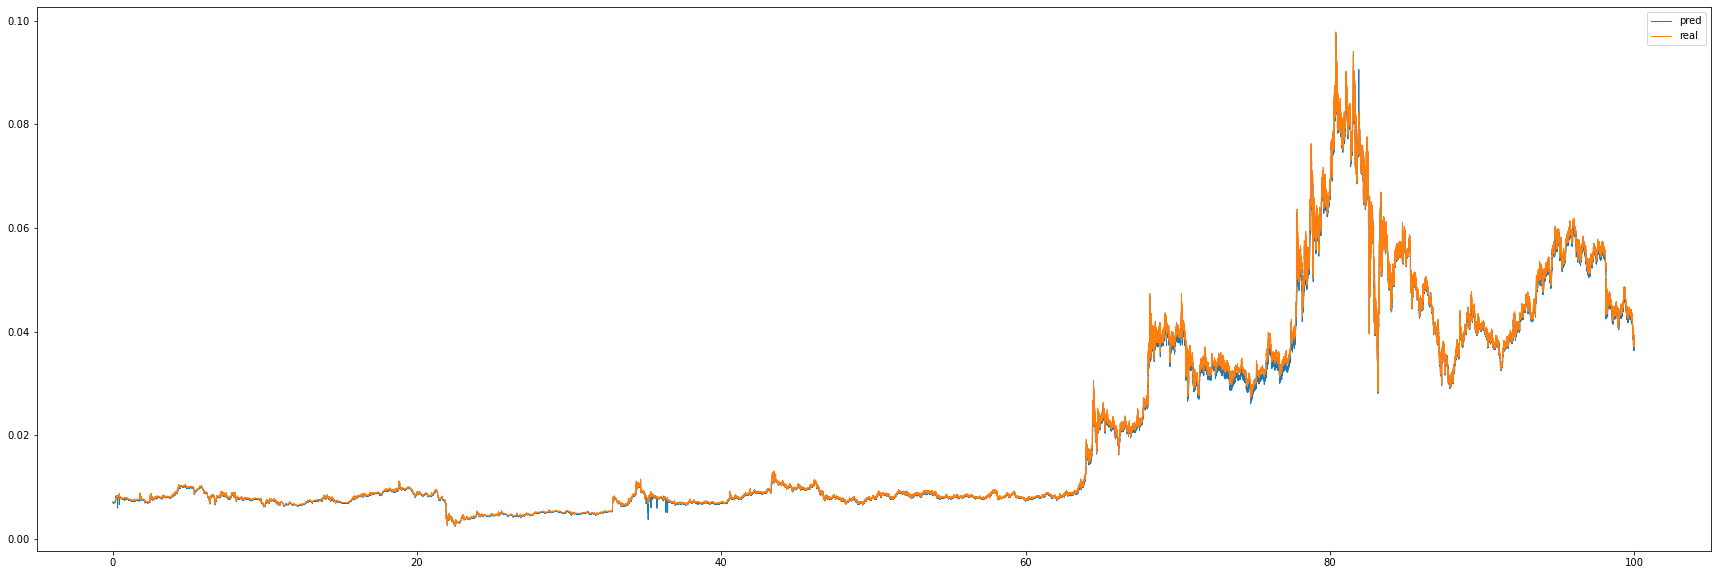

<Figure size 2160x720 with 0 Axes>

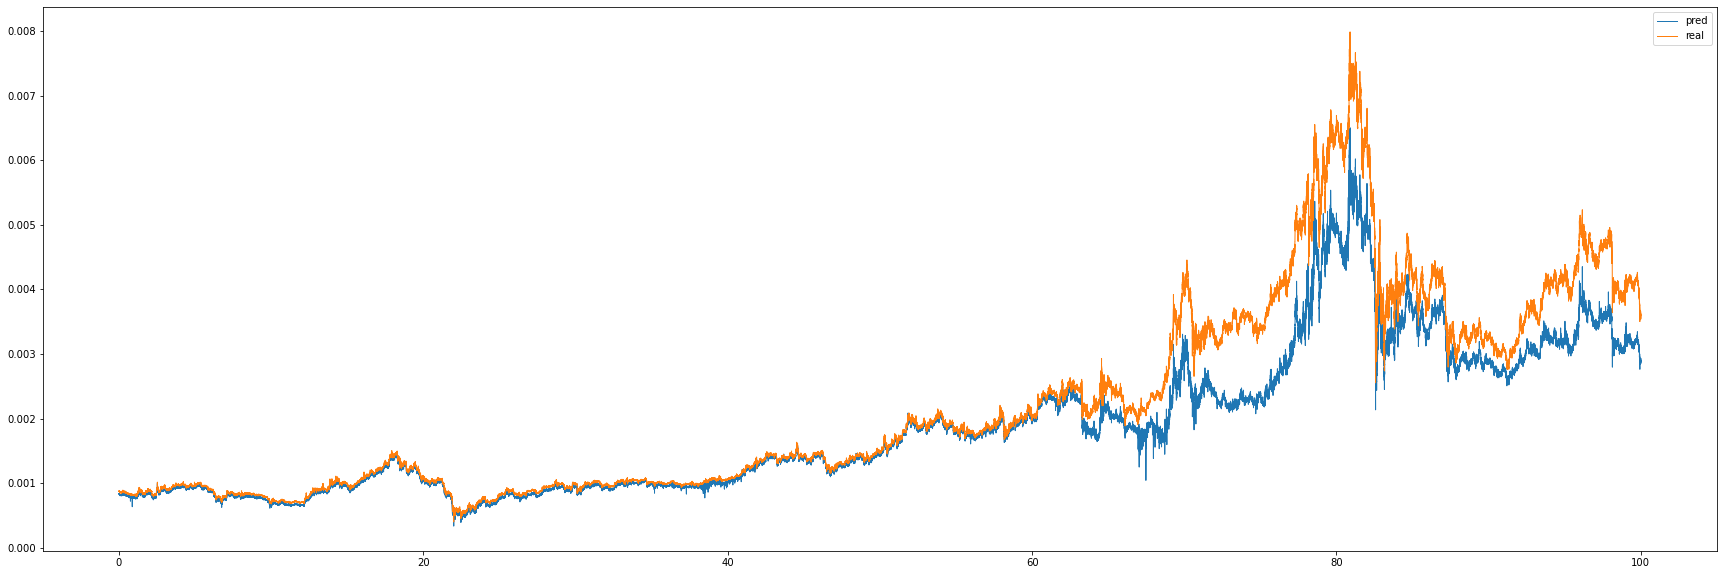

<Figure size 2160x720 with 0 Axes>

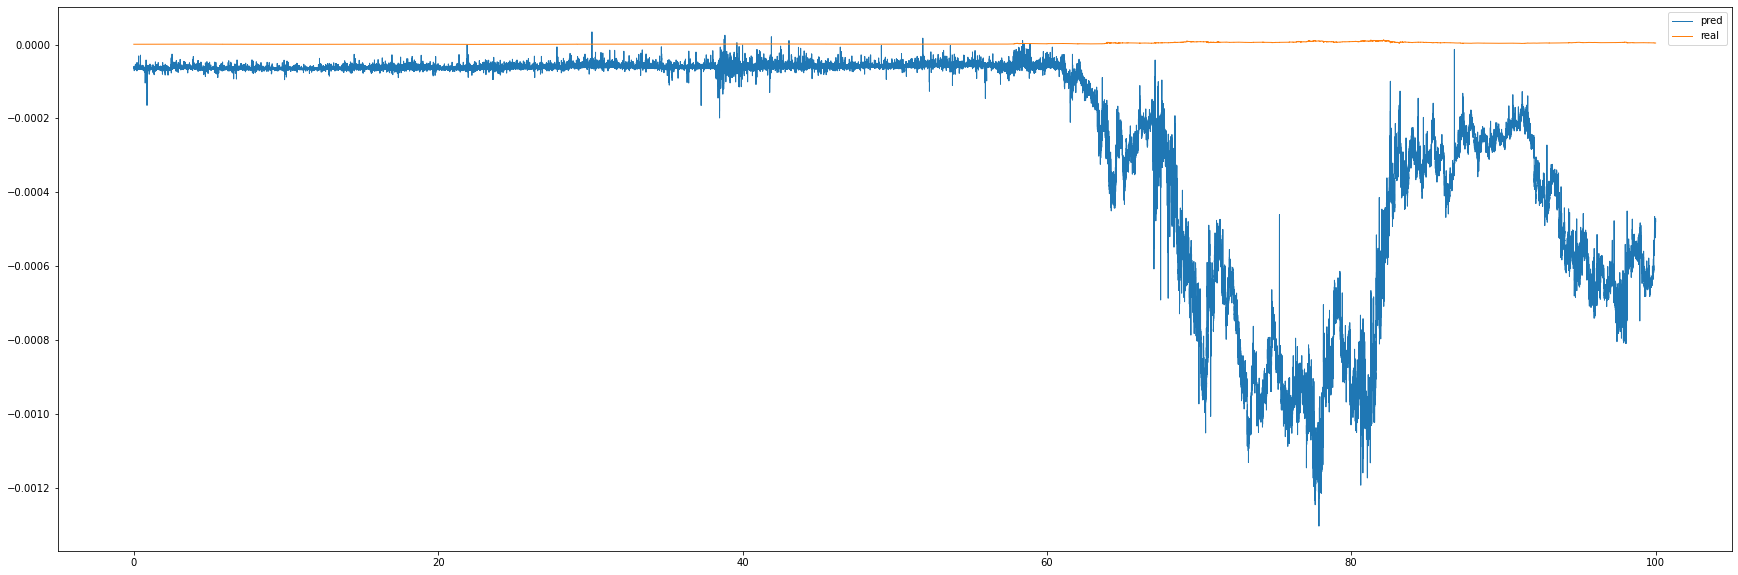

<Figure size 2160x720 with 0 Axes>

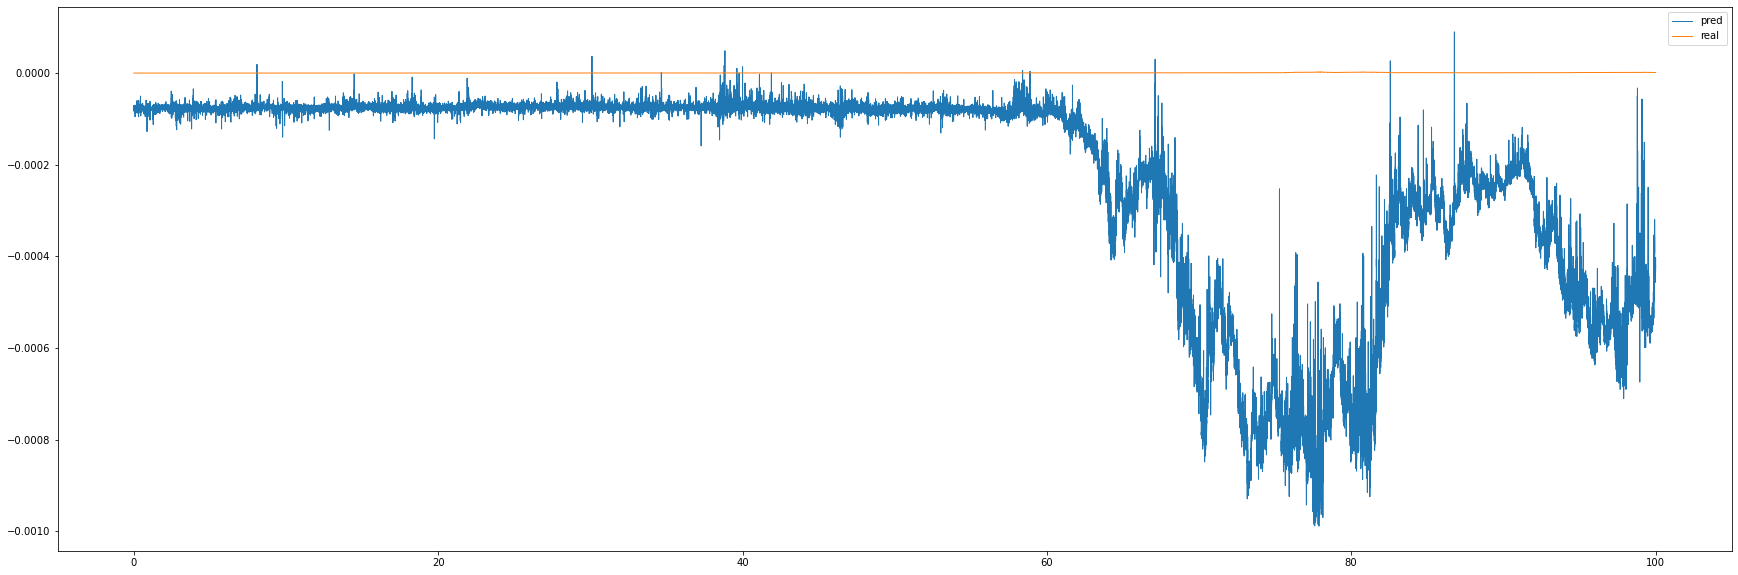

In [79]:
for i in range(14):
    asset_pred = y_predict[:, i]
    asset_real = y_valid[:,i]
    x_ = np.linspace(0,100, 1028024)
    plt.figure(figsize=(30,10))
    plt.plot(x_, asset_pred, x_, asset_real, linewidth=1)
    plt.legend(['pred', 'real'])
    plt.show()